About this dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

    Value 1: typical angina

    Value 2: atypical angina

    Value 3: non-anginal pain

    Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

    Value 0: normal

    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(f"The shape of heart dataset is : {heart.shape}")

The shape of heart dataset is : (303, 14)


In [4]:
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
for i in heart.columns:
    print(f"{i}: \nunique value count: {heart[i].nunique()}")
    print(f"unique value: \n{heart[i].unique()}\n")

age: 
unique value count: 41
unique value: 
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

sex: 
unique value count: 2
unique value: 
[1 0]

cp: 
unique value count: 4
unique value: 
[3 2 1 0]

trtbps: 
unique value count: 49
unique value: 
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

chol: 
unique value count: 152
unique value: 
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 28

In [6]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

In [7]:
cat_cols = ["sex", "exng", "caa", "cp", "fbs", "restecg", "slp", "thall"]
con_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
target = ["output"]
print("Categorial variables: ", cat_cols)
print("Continuous variables: ", con_cols)
print("Target: ", target)

Categorial variables:  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
Continuous variables:  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Target:  ['output']


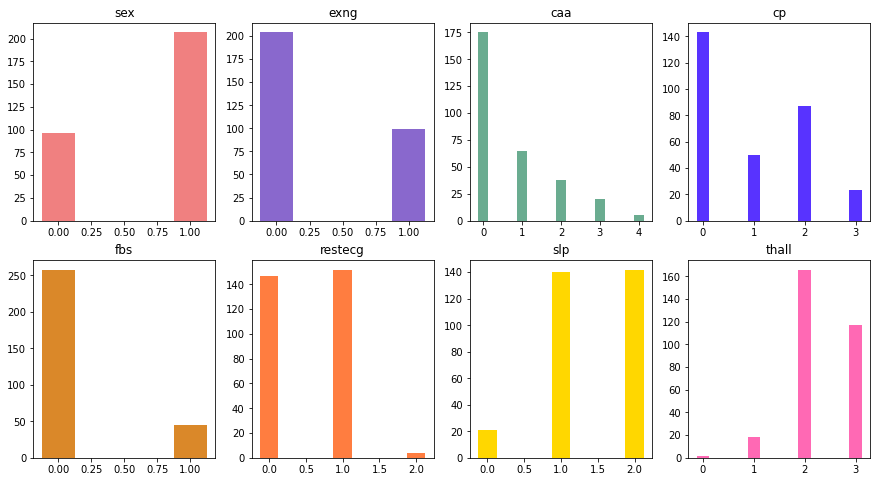

In [34]:
#cat_cols visualization
nrows = 2
ncols = int(len(cat_cols)/nrows)
color_list = ["#F08080","#8968CD","#6aac90","#5833ff","#da8829","#FF7D40","#FFD700","#FF69B4"]
fig, axes = plt.subplots(nrows, ncols, figsize = (15,8))
axes = axes.flatten()
for count, p in enumerate(cat_cols):
    plt.sca(axes[count])
    plt.title(p)
    bins = np.arange(0,max(heart[p]+0.5),0.25)-0.125
    plt.hist(heart[p], bins=bins, color = color_list[count])

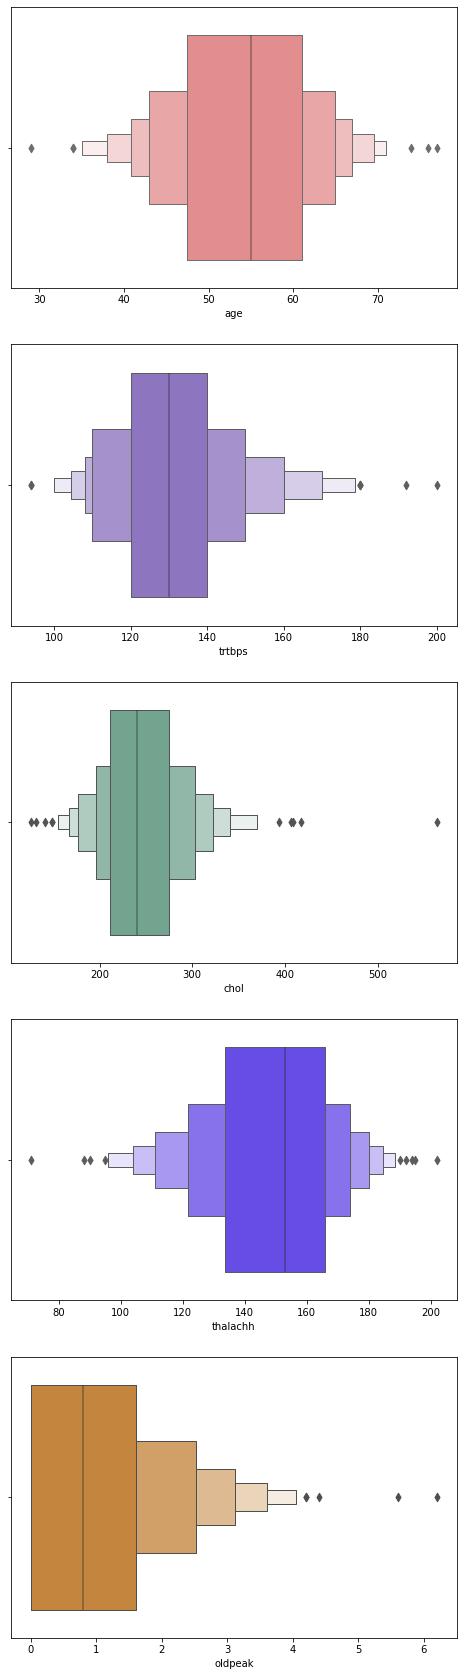

In [35]:
#con_cols boxplot
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = (8,30))
axes = axes.flatten()
for count, p in enumerate(con_cols):
    plt.sca(axes[count])
    sns.boxenplot(data=heart, x = p, color= color_list[count])

/Users/mingtsung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mingtsung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mingtsung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

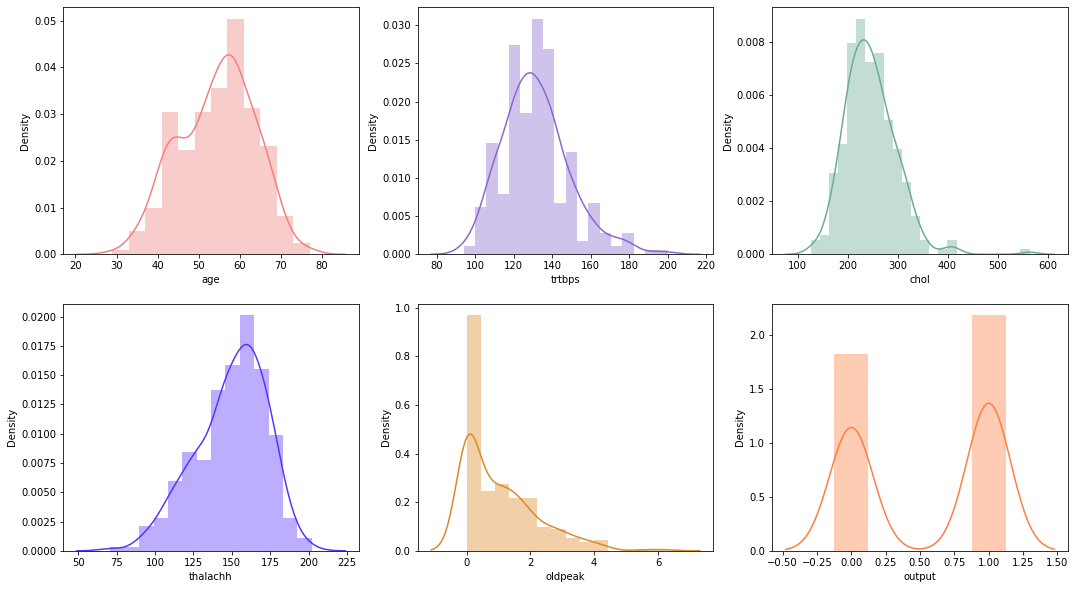

In [10]:
#con_cols distribution plot
fig, axes = plt.subplots(2,3,figsize = (18,10))
axes = axes.flatten()
for count, p in enumerate(con_cols+target):
    #sns.displot(data=heart, x = p, color= color_list[count], kind="kde" ,ax=axes[count])
    if count == 5:
        bins = np.arange(0,max(heart[p]+0.5),0.25)-0.125
    else:
        bins = 'auto'
    sns.distplot(heart[p], color= color_list[count], bins=bins, ax=axes[count])

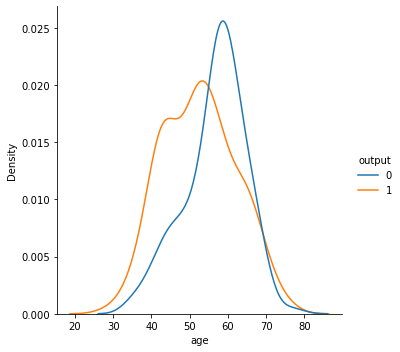

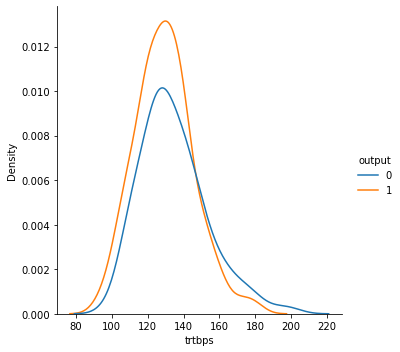

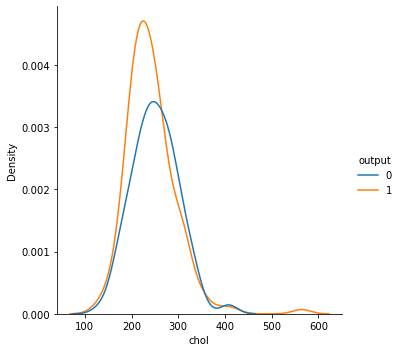

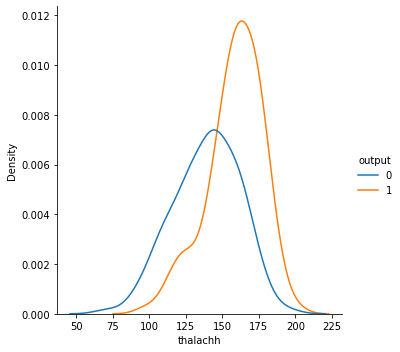

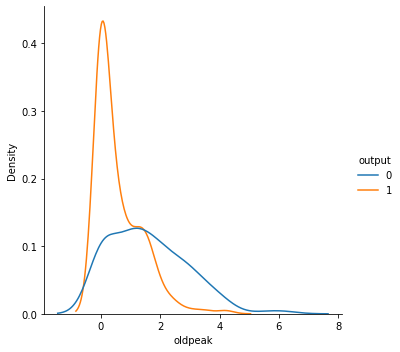

In [11]:
for count, p in enumerate(con_cols):
    sns.displot(data=heart, x = p, color= color_list[count], kind="kde", hue="output")

array([[<AxesSubplot:title={'center':'output'}>]], dtype=object)

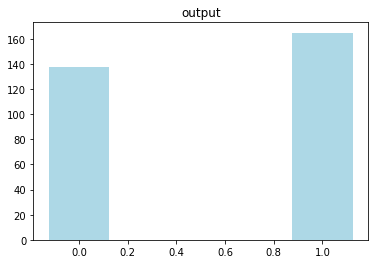

In [12]:
#output histogram
heart[target].hist(grid=False, bins = np.arange(0,1.5,0.25)-0.125, color = "#ADD8E6")

<AxesSubplot:>

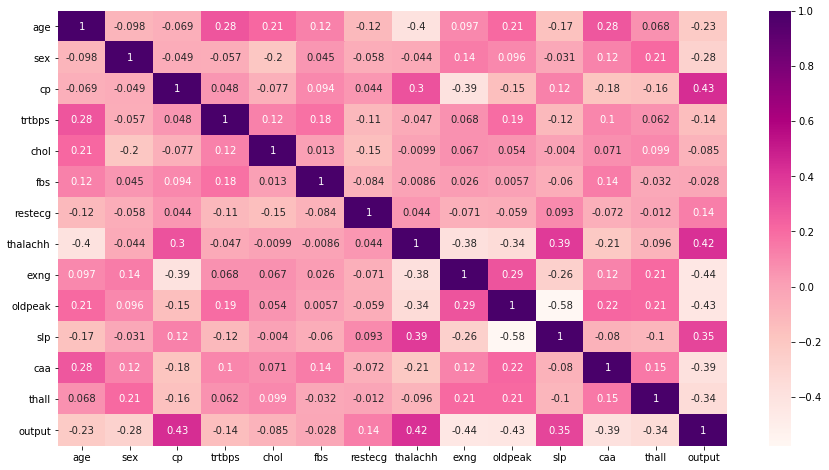

In [13]:
#Check correlation
heart_corr = heart.corr()
plt.figure(figsize = (15,8))
ax = sns.heatmap(heart_corr, annot=True, cmap="RdPu")
ax

EDA Summary:
1. Small dataset, only 303 rows.
2. Cleaned dataset without NA.
3. The categorical variables are uneven distribution. (prople in sex = 1 is twice more than sex = 0)
4. There are serveral outliers.
5. The distribution of output looks okay.
6. There may be some relationship between output and (cp, thalachh, and slp)

# Modeling

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [15]:
X = heart.drop("output", axis=1)
X = pd.get_dummies(X, columns = cat_cols, drop_first = True)
y = heart.output

In [17]:
#scaler
scaler = StandardScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [19]:
# svc
svc_clf = SVC(kernel='linear', random_state=42, probability=True).fit(X_train,y_train)

y_pred_svc = svc_clf.predict(X_test)

y_proba_svc = svc_clf.predict_proba(X_test)[:,-1]

cm_svc = confusion_matrix(y_test, y_pred_svc)

print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred_svc))
print(f"Confusion Matrix: \n{cm_svc}")

The test accuracy score of SVM is  0.8421052631578947
Confusion Matrix: 
[[28  7]
 [ 5 36]]


In [20]:
#logistic
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

y_proba_log = logreg.predict_proba(X_test)[:,-1]

cm_log = confusion_matrix(y_test, y_pred_log)

print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred_log))
print(f"Confusion Matrix: \n{cm_log}")

The test accuracy score of Logistric Regression is  0.881578947368421
Confusion Matrix: 
[[30  5]
 [ 4 37]]


In [21]:
#random forest
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

y_proba_rf = rf.predict_proba(X_test)[:,1]

cm_rf = confusion_matrix(y_test, y_pred_rf)

print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred_rf))
print(f"Confusion Matrix: \n{cm_rf}")

The test accuracy score of Random Forest is  0.8157894736842105
Confusion Matrix: 
[[27  8]
 [ 6 35]]


In [22]:
#xgboost
xgb = xgboost.XGBClassifier(max_depth = 5, n_estimators = 100, learning_rate =0.05, use_label_encoder =False)

xgb.fit(X_train, y_train, eval_metric = 'error')

y_pred_xgb = xgb.predict(X_test)

y_proba_xgb = xgb.predict_proba(X_test)[:,-1]

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print("The test accuracy score of Xgboost is ", accuracy_score(y_test, y_pred_xgb))
print(f"Confusion Matrix: \n{cm_xgb}")

The test accuracy score of Xgboost is  0.8289473684210527
Confusion Matrix: 
[[30  5]
 [ 8 33]]


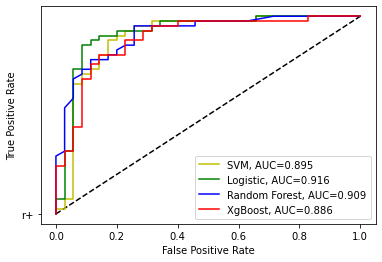

In [33]:
#ROC, AUC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_proba_svc)
auc_svc = roc_auc_score(y_test, y_proba_svc)
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_proba_log)
auc_log = roc_auc_score(y_test, y_proba_log)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr_svc, tpr_svc, "y", label= f"SVM, AUC={round(auc_svc,3)}")
plt.plot(fpr_log, tpr_log, "g", label= f"Logistic, AUC={round(auc_log,3)}")
plt.plot(fpr_rf, tpr_rf, "b", label= f"Random Forest, AUC={round(auc_rf,3)}")
plt.plot(fpr_xgb, tpr_xgb, "r", label= f"XgBoost, AUC={round(auc_xgb,3)}")
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Modeling Conclusion: Logistic Regression perform the best.

Concern: The dataset is too small.

To improve: The best evaluate matric may not be accuracy or error, we should consider the cost of false positive and false negative when training the model.